Ok, let's set

- Cloud = 0
- Clear = 1

In [1]:
import numpy as np
import pylab as plt
import astroML.stats

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12

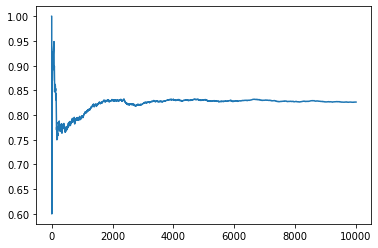

In [10]:
weather = [1] # Weather of the first day

for ii in range(1,10000):
    # implementing forecasts based on probabilities
    if weather[ii-1] == 1:
        weather.append(np.random.choice(np.array([0, 1]),
                                        p=np.array([0.1, 0.9])))
    elif weather[ii-1] == 0:
        weather.append(np.random.choice(np.array([0, 1]),
                                        p=np.array([0.5, 0.5])))
weather = np.array(weather)

running_clear = np.cumsum(weather)/( np.arange(weather.shape[0])+1 )
# plot the running average
plt.plot(running_clear)

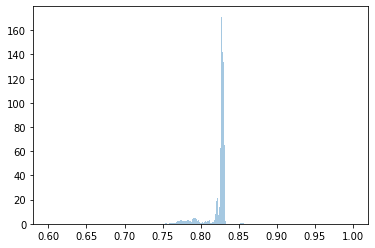

In [11]:
plt.hist(running_clear, bins=300, density=True, alpha=0.4);

In [13]:
print(np.median(running_clear))

0.8278541824912222


In [14]:
print(astroML.stats.sigmaG(running_clear))

0.0025597929915198462


Conservative burn-in: ~2000 samples

0.8282896624482794
0.0018707316044371243


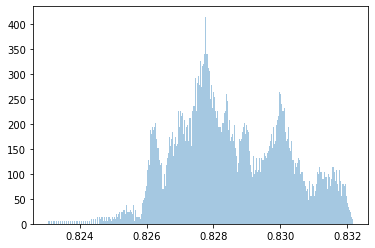

In [16]:
burnin_index=3000
running_burn = running_clear[burnin_index:]


plt.hist(running_burn, bins=300, density=True, alpha=0.4);
print(np.median(running_burn))
print(astroML.stats.sigmaG(running_burn))

Much better, those long tails are gone!